In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import yaml
from cv2 import aruco



# Function to generate Checkerboard 8*8

In [8]:
def save_checkerboard_image(filename, square_size_cm):
    rows, cols = 8, 8
    pixels_per_cm = 100  # Adjust this based on your printing resolution

    square_size_px = int(square_size_cm * pixels_per_cm)
    pattern = np.zeros((rows * square_size_px, cols * square_size_px), dtype=np.uint8) # 8 squrares x 200

    for i in range(0, rows, 2): #from 0 to 6
        for j in range(0, cols, 2):
            pattern[i * square_size_px: (i + 1) * square_size_px, j * square_size_px: (j + 1) * square_size_px] = 255

    for i in range(1, rows, 2): # from 1 to 7
        for j in range(1, cols, 2):
            pattern[i * square_size_px: (i + 1) * square_size_px, j * square_size_px: (j + 1) * square_size_px] = 255

    cv2.imwrite(filename, pattern)
    print(f"Checkerboard pattern saved to: {filename}")

In [9]:
save_checkerboard_image("checkerboard_pattern_8x8.png", square_size_cm=2)


Checkerboard pattern saved to: checkerboard_pattern_8x8.png


# Function to generate circle pattern 8*8

In [10]:

def generate_circle_pattern(grid_size=(8, 8), circle_diameter=0.05, save_path='circle_pattern.png'):

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')

    # Determine the spacing between circles based on the grid size
    spacing_x = 1.0 / grid_size[1]
    spacing_y = 1.0 / grid_size[0]

    # Generate circle positions
    positions = [(x * spacing_x + spacing_x / 2, y * spacing_y + spacing_y / 2) for y in range(grid_size[0]) for x in range(grid_size[1])]

    # Draw circles
    for pos in positions:
        circle = plt.Circle(pos, circle_diameter / 2, color='black')
        ax.add_artist(circle)

    # Set limits and save the figure
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    plt.gca().invert_yaxis()  # Invert y-axis to have the origin at the top left
    plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches=0)
    plt.close()

In [11]:

generate_circle_pattern()


# Function to generate ChAruco pattern 8*8

In [12]:
# Example Constants - Adjust these according to your needs
ARUCO_DICT = cv2.aruco.DICT_6X6_250
SQUARES_VERTICALLY = 7
SQUARES_HORIZONTALLY = 5
SQUARE_LENGTH = 0.04  # in meters or any unit of measure
MARKER_LENGTH = 0.02  # smaller than SQUARE_LENGTH
LENGTH_PX = 600  # Desired width in pixels for the generated image
MARGIN_PX = 50  # Margin size in pixels (not directly used in drawing function but can be used for calculations)
SAVE_NAME = 'charuco_board.png'

In [13]:
def create_and_save_new_board():
    dictionary = cv2.aruco.getPredefinedDictionary(ARUCO_DICT)
    board = cv2.aruco.CharucoBoard((SQUARES_VERTICALLY, SQUARES_HORIZONTALLY), SQUARE_LENGTH, MARKER_LENGTH, dictionary)
    size_ratio = SQUARES_HORIZONTALLY / SQUARES_VERTICALLY
    img = cv2.aruco.CharucoBoard.generateImage(board, (LENGTH_PX, int(LENGTH_PX*size_ratio)), marginSize=MARGIN_PX)

    cv2.imshow("Charuco Board", img)
    cv2.waitKey(2000)  # Waits for 2000 ms
    cv2.destroyAllWindows()  # Close the window after the wait
    cv2.imwrite(SAVE_NAME, img)

create_and_save_new_board()

*******

# **Camera Calibration Using Checker Board**

-   **Corner Detection 8*8 checkerboard**

In [3]:
CHESS_BOARD_DIM = (7, 7)    
#dimension of the intersections of the image  that we would test with it (8*8) --> (7*7) , if (12*8) --> (11*7)
frame_size = (1600,1600)
n = 0  # image_counter


In [4]:
image_dir_path = "Checker_board_images"

CHECK_DIR = os.path.isdir(image_dir_path)
# if directory does not exist create
if not CHECK_DIR:
    os.makedirs(image_dir_path)
    print(f'"{image_dir_path}" Directory is created')
else:
    print(f'"{image_dir_path}" Directory already Exists.')

"Checker_board_images" Directory is created


In [5]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# The function is documented on OpenCV site for more details
# 30 is the number of iterations
# 0.001 is epsilon which detects error value 
# It converges when each of the conditions are reached


In [6]:
def detect_checker_board(image, grayImage, criteria, boardDimension):
    ret, corners = cv2.findChessboardCorners(grayImage, boardDimension)
    if ret == True:
        corners1 = cv2.cornerSubPix(grayImage, corners, (3, 3), (-1, -1), criteria)
        image = cv2.drawChessboardCorners(image, boardDimension, corners1, ret)

    return image, ret


In [10]:
logitech_camera1_path = 2      # that number is adjusted with respect to port to which it connected
cap = cv2.VideoCapture(logitech_camera1_path)


In [8]:
_ , frameT = cap.read()


TypeError: Image data of dtype object cannot be converted to float

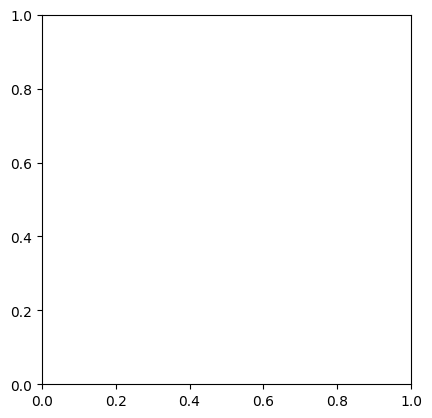

In [9]:
plt.imshow(frameT)

        Capture Images with corner detection

In [ ]:
# The below code is the same used in the Trial 1 for testing cameras code file
while True:
    trash , frame = cap.read()
    # copied_Frame = frame.copy()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    image, board_detected = detect_checker_board(frame, gray, criteria, CHESS_BOARD_DIM)
    # print(ret)
    cv2.putText(frame,f"saved_img : {n}",(30, 40),cv2.FONT_HERSHEY_PLAIN,1.4,(0, 255, 0),2,cv2.LINE_AA,)

    cv2.imshow("frame", frame)
    # cv2.imshow("copyFrame", copied_Frame)

    key = cv2.waitKey(1)

    if key == ord("q"):
        break
    if key == ord("s") and board_detected == True:
        # save the output image
        cv2.imwrite(f"{image_dir_path}/image{n}.png", frame)
        print(f"saved image number {n}")
        n += 1  # incrementing the image counter to count number of saved imgs
        
cap.release()
cv2.destroyAllWindows()

print("Total saved Images:", n)

Total saved Images: 0


        Capture Normal Images That will be used for points extraction for calibration

In [6]:
# The below code is the same used in the Trial 1 for testing cameras code file
while True:
    trash , frame = cap.read()
    # copied_Frame = frame.copy()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # print(ret)
    cv2.putText(frame,f"saved_img : {n}",(30, 40),cv2.FONT_HERSHEY_PLAIN,1.4,(0, 255, 0),2,cv2.LINE_AA,)

    cv2.imshow("frame", frame)
    # cv2.imshow("copyFrame", copied_Frame)

    key = cv2.waitKey(1)

    if key == ord("q"):
        break
    if key == ord("s"):
        # save the output image
        cv2.imwrite(f"{image_dir_path}/image{n}.png", frame)
        print(f"saved image number {n}")
        n += 1  # incrementing the image counter to count number of saved imgs
        
cap.release()
cv2.destroyAllWindows()

print("Total saved Images:", n)

NameError: name 'cap' is not defined

- **Extraction of Intrinsic and Extrinsic Parameters**

In [6]:
# Make file to store calibration data results in it
data_calib_path = "calibration_data"

CHECK_DIR = os.path.isdir(data_calib_path)
# if directory does not exist create
if not CHECK_DIR:
    os.makedirs(data_calib_path)
    print(f'"{data_calib_path}" Directory is created')
else:
    print(f'"{data_calib_path}" Directory already Exists.')

"calibration_data" Directory already Exists.


        Real Points Coordinates Grid creation

In [7]:
Square_size = 25    # size of square on checker board in real life
points = np.zeros((CHESS_BOARD_DIM[0]*CHESS_BOARD_DIM[1],3),np.float32) #matrix of points

In [8]:
pointsCopied = points.copy()
pointsCopied
#better to deal with copied version to avoid distorting the actual data

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0

In [9]:
pointsCopied[:,:2] = np.mgrid[0 : CHESS_BOARD_DIM[0], 0 : CHESS_BOARD_DIM[1]].T.reshape(-1, 2)
# transpose and reshape to adjust the size to be coordinates for real world 
pointsCopied *= Square_size

In [10]:
objPoints = []
imgPoints = []

image_dir_path = "images"
files =os.listdir(image_dir_path)
save_path = 'detected_Checker_pattern'

for file in files:
    print(file)
    imagePath = os.path.join(image_dir_path, file)
    # print(imagePath)
    
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, CHESS_BOARD_DIM, None)

    # If found, add object points, image points (after refining them)
    if ret == True:

        objPoints.append(pointsCopied)
        corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgPoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(image, CHESS_BOARD_DIM, corners2, ret)
        cv2.imshow('img', image)
        cv2.waitKey(1000)


cv2.destroyAllWindows()


image0.png


NameError: name 'objp' is not defined

        Calibration 

In [6]:
repErr , intrinsic_mat , distortion , r_Extrinsic_mat, t_Extrinsic_mat = cv2.calibrateCamera(objPoints, imgPoints, gray.shape[::-1], None, None)


NameError: name 'objPoints' is not defined

In [12]:
print('Reprojection Error (Pixels) ',repErr)
print('Camera Matrix \n',intrinsic_mat)


Reprojection Error (Pixels)  0.26409610897686003
Camera Matrix 
 [[699.86626733   0.         289.06872715]
 [  0.         696.93585485 223.80495588]
 [  0.           0.           1.        ]]


        Store the calibration data

In [31]:
np.savez(
    f"{data_calib_path}/MultiMatrix",
    camMatrix=intrinsic_mat,
    distCoef=distortion,
    rVector=r_Extrinsic_mat,
    tVector=t_Extrinsic_mat,
)

        In case I want to load it Again

In [20]:
# Calibration_file_Path = data_calib_path
# data = np.load(f"{Calibration_file_Path}/MultiMatrix.npz")

# camMatrix = data["Intrinsic"]
# distCof = data["Distortion"]
# rVector = data["Extrinsic Rotation"]
# tVector = data["Extrinsic Translation"]

# print("loaded calibration data successfully")

        Removing Distortion

In [13]:
def remove_distortion(img):
    h,  w = img.shape[:2]
    newCameraMatrix, roi = cv2.getOptimalNewCameraMatrix(intrinsic_mat, distortion, (w,h), 1, (w,h))
    print(newCameraMatrix)
    # Undistort
    imgUndist  = cv2.undistort(img, intrinsic_mat, distortion, None, newCameraMatrix)

    # crop the image
    x, y, w, h = roi
    imgUndistCropped = imgUndist[y:y+h, x:x+w]
    cv2.imwrite('caliResult1.png', imgUndist)
        
    # Draw Line to See Distortion Change 
    cv2.line(img,(1769,103),(1780,922),(255,255,255),2)
    cv2.line(imgUndist,(1769,103),(1780,922),(255,255,255),2)

    plt.figure() 
    plt.subplot(121)
    plt.imshow(img)
    #plt.subplot(122)
    #plt.imshow(imgUndist)
    plt.subplot(122)
    plt.imshow(imgUndistCropped)
    plt.show()
    return newCameraMatrix


[[703.26996082   0.         289.62451299]
 [  0.         695.62935401 223.12361843]
 [  0.           0.           1.        ]]


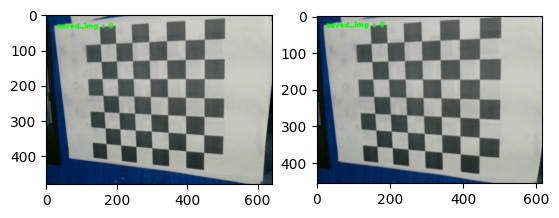

In [14]:
img = cv2.imread('image0.png')
newCameraMatrix = remove_distortion(img)

In [15]:
mean_error = 0
for i in range(len(objPoints)):
    imgpoints2, _ = cv2.projectPoints(objPoints[i], r_Extrinsic_mat[i], t_Extrinsic_mat[i], newCameraMatrix, distortion)
    error = cv2.norm(imgPoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error

print( "total error (pixels): {}".format(mean_error/len(objPoints)) )


total error (pixels): 0.16175565668760505


# **Camera Calibration Using Circular Board Pattern**

In [2]:
Circular_DIM = (4,11)    
#dimension of the intersections of the image  that we would test with it (8*8) --> (7*7) , if (12*8) --> (11*7)
frame_size = (1600,1600)
n = 0  # image_counter

# Parameters
image_dir_path = "Circular_pattern"
files = os.listdir(image_dir_path)

In [3]:
CHECK_DIR = os.path.isdir(image_dir_path)
# if directory does not exist create
if not CHECK_DIR:
    os.makedirs(image_dir_path)
    print(f'"{image_dir_path}" Directory is created')
else:
    print(f'"{image_dir_path}" Directory already Exists.')

"Circular_pattern" Directory already Exists.


In [4]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)


        Blob Detector Function Init With HyperParameters

In [5]:
# Setup SimpleBlobDetector parameters.
blobParams = cv2.SimpleBlobDetector_Params()

# Change thresholds
blobParams.minThreshold = 8
blobParams.maxThreshold = 255

# Filter by Area.
blobParams.filterByArea = True
blobParams.minArea = 64     # minArea may be adjusted to suit for your experiment
blobParams.maxArea = 2500   # maxArea may be adjusted to suit for your experiment

# Filter by Circularity
blobParams.filterByCircularity = True
blobParams.minCircularity = 0.1

# Filter by Convexity
blobParams.filterByConvexity = True
blobParams.minConvexity = 0.87

# Filter by Inertia
blobParams.filterByInertia = True
blobParams.minInertiaRatio = 0.01

# Create a detector with the parameters
blobDetector = cv2.SimpleBlobDetector_create(blobParams) 
# Could use that if we want the default parameters instead of the above parameters

In [6]:
with open('Circular_pattern_points.yml', 'r') as file:
    data = yaml.safe_load(file)

# Assuming the data is under the 'points' key
points_list = data['points']

# Convert list of lists into a NumPy array
objp_ = np.array(points_list, dtype=np.float32)
print(objp_)

[[  0.   0.   0.]
 [  0.  72.   0.]
 [  0. 144.   0.]
 [  0. 216.   0.]
 [ 36.  36.   0.]
 [ 36. 108.   0.]
 [ 36. 180.   0.]
 [ 36. 252.   0.]
 [ 72.   0.   0.]
 [ 72.  72.   0.]
 [ 72. 144.   0.]
 [ 72. 216.   0.]
 [108.  36.   0.]
 [108. 108.   0.]
 [108. 180.   0.]
 [108. 252.   0.]
 [144.   0.   0.]
 [144.  72.   0.]
 [144. 144.   0.]
 [144. 216.   0.]
 [180.  36.   0.]
 [180. 108.   0.]
 [180. 180.   0.]
 [180. 252.   0.]
 [216.   0.   0.]
 [216.  72.   0.]
 [216. 144.   0.]
 [216. 216.   0.]
 [252.  36.   0.]
 [252. 108.   0.]
 [252. 180.   0.]
 [252. 252.   0.]
 [288.   0.   0.]
 [288.  72.   0.]
 [288. 144.   0.]
 [288. 216.   0.]
 [324.  36.   0.]
 [324. 108.   0.]
 [324. 180.   0.]
 [324. 252.   0.]
 [360.   0.   0.]
 [360.  72.   0.]
 [360. 144.   0.]
 [360. 216.   0.]]


In [7]:
objectPoints = [] # 3d point in real world space
imagePoints = [] # 2d points in image plane.

In [8]:
cap = cv2.VideoCapture(0)


KeyboardInterrupt: 

        Code to detect blobs and capture images

In [20]:
while(True):  # Here, 10 can be changed to whatever number you like to choose
    ret, img = cap.read() # Capture frame-by-frame
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    keypoints = blobDetector.detect(gray) # Detect blobs.

    # Draw detected blobs as red circles. This helps cv2.findCirclesGrid() .
    im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    im_with_keypoints_gray = cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findCirclesGrid(im_with_keypoints, (4,11), None, flags = cv2.CALIB_CB_ASYMMETRIC_GRID)   # Find the circle grid

    if ret == True:
        objectPoints.append(objp_)  # Certainly, every loop objp is the same, in 3D.

        corners2 = cv2.cornerSubPix(im_with_keypoints_gray, corners, (11,11), (-1,-1), criteria)    # Refines the corner locations.
        imagePoints.append(corners2)

        # Draw and display the corners.
        im_with_keypoints = cv2.drawChessboardCorners(img, (4,11), corners2, ret)
    if key == ord("s"):

        cv2.imwrite(f"{image_dir_path}/image{n}.png", img)
        print(f"saved image number {n}")
        n +=1
        
    if key == ord("q"):
        break
        
    cv2.imshow("img", im_with_keypoints) # display
    key = cv2.waitKey(2)

# When everything done, release the capture
# cap.release()

cv2.destroyAllWindows()

NameError: name 'cap' is not defined

In [15]:
found = 0
while(found < 10):  # Here, 10 can be changed to whatever number you like to choose
    ret, img = cap.read() # Capture frame-by-frame
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    keypoints = blobDetector.detect(gray) # Detect blobs.

    # Draw detected blobs as red circles. This helps cv2.findCirclesGrid() .
    im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    im_with_keypoints_gray = cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findCirclesGrid(im_with_keypoints, (4,11), None, flags = cv2.CALIB_CB_ASYMMETRIC_GRID)   # Find the circle grid

    if ret == True:
        objectPoints.append(objp_)  # Certainly, every loop objp is the same, in 3D.

        corners2 = cv2.cornerSubPix(im_with_keypoints_gray, corners, (11,11), (-1,-1), criteria)    # Refines the corner locations.
        imagePoints.append(corners2)

        # Draw and display the corners.
        im_with_keypoints = cv2.drawChessboardCorners(img, (4,11), corners2, ret)
        found += 1

    cv2.imshow("img", im_with_keypoints) # display
    cv2.waitKey(2)

# When everything done, release the capture
cv2.destroyAllWindows()

NameError: name 'cap' is not defined

In [9]:

detected_dir = 'detected_circular_pattern'

for image in files:
    print(image)
    imagePath = os.path.join(image_dir_path, image)
    
    if image is None:
        continue
    print(imagePath)
    
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findCirclesGrid(gray, (4, 11), None, flags=cv2.CALIB_CB_ASYMMETRIC_GRID)
    
    if ret:
        imagePoints.append(corners)
        objectPoints.append(objp_)
        
        # Draw and display the pattern detected
        vis = cv2.drawChessboardCorners(image, Circular_DIM, corners, ret)
        
        # Save the detected image
        save_path = os.path.join(detected_dir, image)
        cv2.imwrite(save_path, vis)
        
        cv2.imshow('Pattern detected', vis)
        cv2.waitKey(500)
        
cv2.destroyAllWindows()

image0.png
Circular_pattern\image0.png


TypeError: join() argument must be str, bytes, or os.PathLike object, not 'ndarray'

In [15]:
retErr_circ, intrinsic_mat_circ, distortion_circ, r_Extrinsic_mat_circ , t_Extrinsic_mat_circ = cv2.calibrateCamera(objectPoints, imagePoints, gray.shape[::-1], None, None)


In [16]:
intrinsic_mat_circ

array([[801.21748615,   0.        , 319.10398047],
       [  0.        , 784.61097436, 156.62747294],
       [  0.        ,   0.        ,   1.        ]])

In [17]:
print('Reprojection Error (Pixels) ',retErr_circ)
print('Camera Matrix \n',intrinsic_mat_circ)


Reprojection Error (Pixels)  0.272093527125354
Camera Matrix 
 [[801.21748615   0.         319.10398047]
 [  0.         784.61097436 156.62747294]
 [  0.           0.           1.        ]]


In [18]:
print('Reprojection Error (Pixels) ',repErr)
print('Camera Matrix \n',intrinsic_mat)


NameError: name 'repErr' is not defined

In [19]:
def remove_distortion(img):
    h,  w = img.shape[:2]
    newCameraMatrix, roi = cv2.getOptimalNewCameraMatrix(intrinsic_mat_circ, distortion_circ, (w,h), 1, (w,h))
    print(newCameraMatrix)
    # Undistort
    imgUndist  = cv2.undistort(img, intrinsic_mat_circ, distortion_circ, None, newCameraMatrix)

    # crop the image
    x, y, w, h = roi
    imgUndistCropped = imgUndist[y:y+h, x:x+w]
    cv2.imwrite('caliResult1.png', imgUndist)
        
    # Draw Line to See Distortion Change 
    cv2.line(img,(1769,103),(1780,922),(255,255,255),2)
    cv2.line(imgUndist,(1769,103),(1780,922),(255,255,255),2)

    plt.figure() 
    plt.subplot(121)
    plt.imshow(img)
    #plt.subplot(122)
    #plt.imshow(imgUndist)
    plt.subplot(122)
    plt.imshow(imgUndistCropped)
    plt.show()
    return newCameraMatrix


[[736.41774232   0.         316.45621252]
 [  0.         742.65713291 152.61179152]
 [  0.           0.           1.        ]]


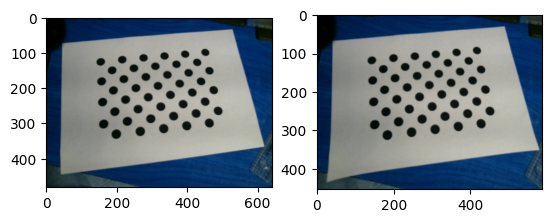

In [20]:
img = cv2.imread('image3.png')
newcameramtx = remove_distortion(img)

# **Camera Calibration Using ChAruco Pattern**

In [2]:
image_dir_path_ChAruco = "ChAruco_Images_Path"

CHECK_DIR = os.path.isdir(image_dir_path_ChAruco)
# if directory does not exist create
if not CHECK_DIR:
    os.makedirs(image_dir_path_ChAruco)
    print(f'"{image_dir_path_ChAruco}" Directory is created')
else:
    print(f'"{image_dir_path_ChAruco}" Directory already Exists.')

"ChAruco_Images_Path" Directory already Exists.


In [3]:
logitech_camera1_path = 1      # that number is adjusted with respect to port to which it connected
cap = cv2.VideoCapture(logitech_camera1_path)


In [4]:
_ , f =cap.read()

In [ ]:
plt.imshow(f)

In [6]:
# The below code is the same used in the Trial 1 for testing cameras code file
n = 0
while True:
    trash , frame = cap.read()
    # copied_Frame = frame.copy()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # print(ret)
    cv2.putText(frame,f"saved_img : {n}",(30, 40),cv2.FONT_HERSHEY_PLAIN,1.4,(0, 255, 0),2,cv2.LINE_AA,)

    cv2.imshow("frame", frame)
    # cv2.imshow("copyFrame", copied_Frame)

    key = cv2.waitKey(1)

    if key == ord("q"):
        break
    if key == ord("s"):
        # save the output image
        cv2.imwrite(f"{image_dir_path_ChAruco}/image{n}.png", frame)
        print(f"saved image number {n}")
        n += 1  # incrementing the image counter to count number of saved imgs
        
cap.release()
cv2.destroyAllWindows()

print("Total saved Images:", n)

saved image number 0
saved image number 1
saved image number 2
saved image number 3
saved image number 4
saved image number 5
saved image number 6
saved image number 7
saved image number 8
saved image number 9
saved image number 10
saved image number 11
saved image number 12
saved image number 13
Total saved Images: 14


In [11]:
# Parameters
files = os.listdir(image_dir_path_ChAruco)
images_path = []    

for image in files:
    print(image)
    imagePath = os.path.join(image_dir_path_ChAruco, image)
    
    if image is None:
        
        continue
    print(imagePath)
    
    images_path.append(imagePath)
   
cv2.destroyAllWindows() 

image0.png
ChAruco_Images_Path\image0.png
image1.png
ChAruco_Images_Path\image1.png
image10.png
ChAruco_Images_Path\image10.png
image11.png
ChAruco_Images_Path\image11.png
image12.png
ChAruco_Images_Path\image12.png
image13.png
ChAruco_Images_Path\image13.png
image14.png
ChAruco_Images_Path\image14.png
image15.png
ChAruco_Images_Path\image15.png
image16.png
ChAruco_Images_Path\image16.png
image17.png
ChAruco_Images_Path\image17.png
image18.png
ChAruco_Images_Path\image18.png
image19.png
ChAruco_Images_Path\image19.png
image2.png
ChAruco_Images_Path\image2.png
image20.png
ChAruco_Images_Path\image20.png
image21.png
ChAruco_Images_Path\image21.png
image22.png
ChAruco_Images_Path\image22.png
image3.png
ChAruco_Images_Path\image3.png
image4.png
ChAruco_Images_Path\image4.png
image5.png
ChAruco_Images_Path\image5.png
image6.png
ChAruco_Images_Path\image6.png
image7.png
ChAruco_Images_Path\image7.png
image8.png
ChAruco_Images_Path\image8.png
image9.png
ChAruco_Images_Path\image9.png
